#gerekli python kutuphanelerini ve datasetleri import edelimm

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px #cok az kodla etkilesimli grafikler olusturmamızı saglar
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#wordcloud metinleri gorsellestirmek kalıplar hakkında bilgi edinmek için kullanılır
#stopwords cok az sayıda yararlı bilgileri tasicak kelimeleri siler a, an, in , over, on vs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
#gercek zamanlı tahminler yapmak için kullanılır

In [79]:
ID=pd.read_csv("Instagram.csv", encoding='latin1')

In [80]:
ID

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [81]:
print(ID.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

before starting, checking dataset for have null variable

In [82]:
ID.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [83]:
ID=ID.dropna()

In [84]:
#deleted all of null variables
ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


C:\Users\Dilber\AppData\Local\Temp\ipykernel_11516\1207073641.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




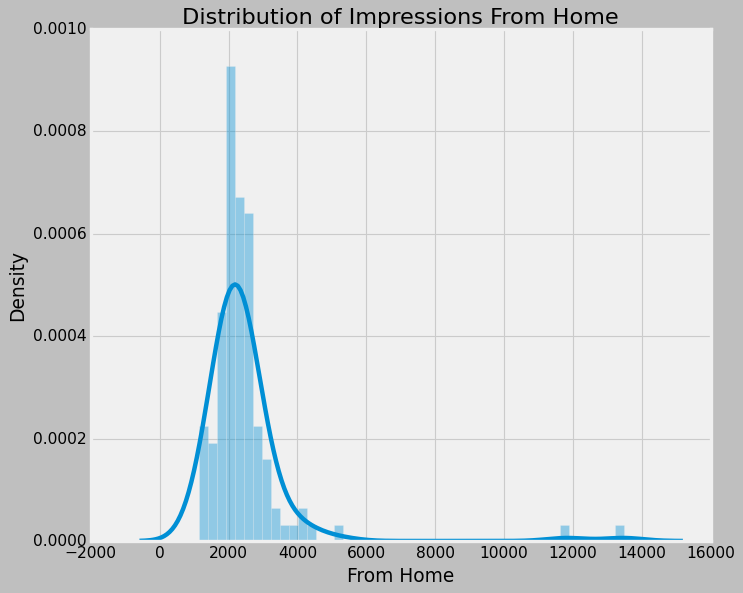

In [85]:
# analysis Instagram acsses
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions From Home') #gosterimlerin dagilimlari
sns.distplot(ID["From Home"])#evden alınan dagilimlari
plt.show()

now lets have a look at the distribution of the impressions i received from hashtags

C:\Users\Dilber\AppData\Local\Temp\ipykernel_11516\4244696888.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




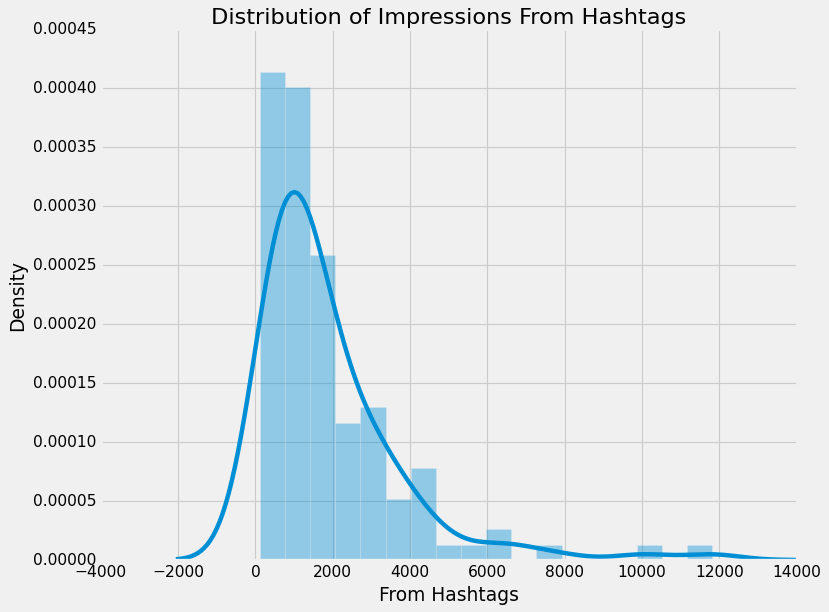

In [86]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(ID['From Hashtags'])
plt.show()

Hashtag gösterimlerine bakıldığında, hashtag kullanılarak tüm gönderilere ulaşılamadığı ancak hashtaglerden birçok yeni kullanıcıya ulaşılabildiği görülüyor. Şimdi Instagram'ın keşfet bölümünden aldığım izlenimlerin dağılımına bir göz atalım:


plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(ID['From Explore'])
plt.show()

C:\Users\Dilber\AppData\Local\Temp\ipykernel_11516\1861920173.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




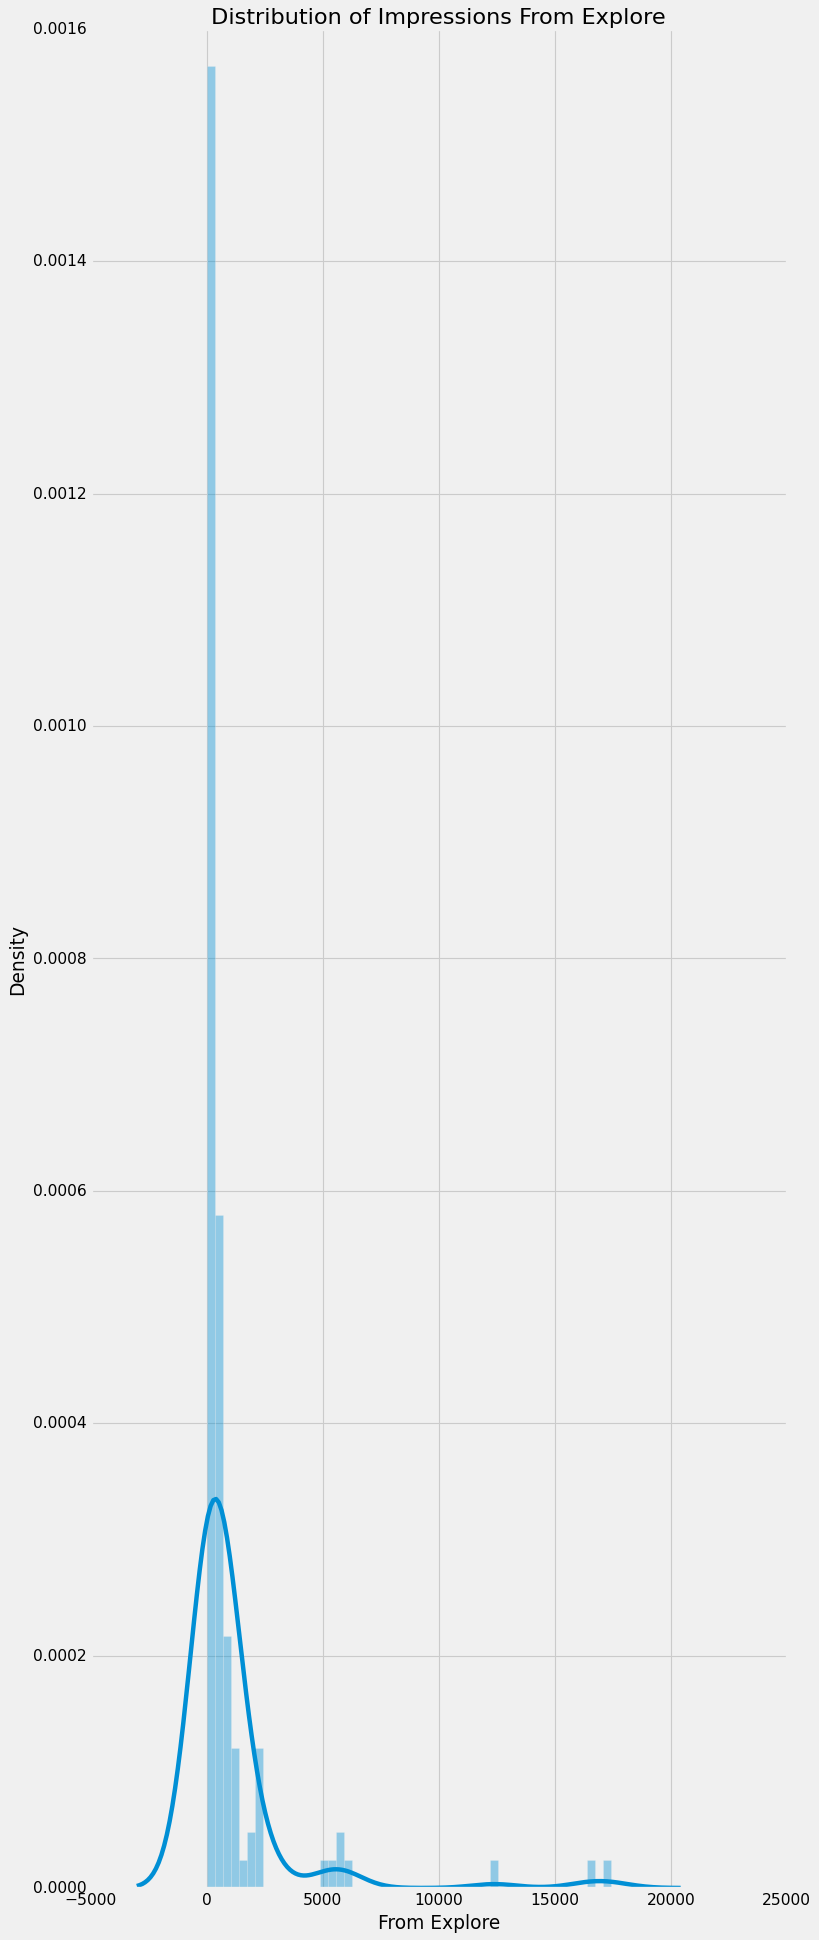

In [87]:
plt.figure(figsize=(10,28))
plt.title("Distribution of Impressions From Explore")
sns.distplot(ID['From Explore'])
plt.show()

Şimdi bu gosterimlerin yuzdesel oranlarına bakalim hashtags, home ve explore

In [88]:
home=ID['From Home'].sum()
hashtags=ID['From Hashtags'].sum()
explore=ID['From Explore'].sum()
other=ID['From Other'].sum()

labels=['From Home','From Hashtags','From Explore','Other']
values=[home,hashtags,explore,other]
#values kısmı bizim sutunlarımızın degerlerinin toplamını içeriyo

fig=px.pie(ID,values=values, names=labels,
title="Impressions on Instagram Posts From Various Sources",hole=0.5)

#px kutuphanesinin pie fonksiyonu kullanılıyor
#values=values her bir dilimin sayısal ifadelerini belirtir
#names=label etiketini kullanarak her dilimin anlamını belirliyoruz

fig.show()



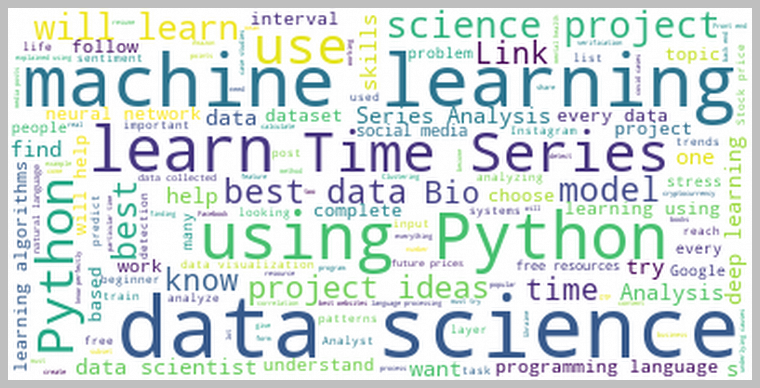

In [89]:
text=" ".join(i for i in ID.Caption) #her ifadeyi bosluk karakteri kullanarak birlestirir
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords, background_color="white").generate(text)
#wordcloud kelime bulutu demek
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='lanczos')
plt.axis('off')
plt.show()

şimdi hashtag sutununda en cok kullanılan kelimeleri bulmak için hashtag sutununa bakalım

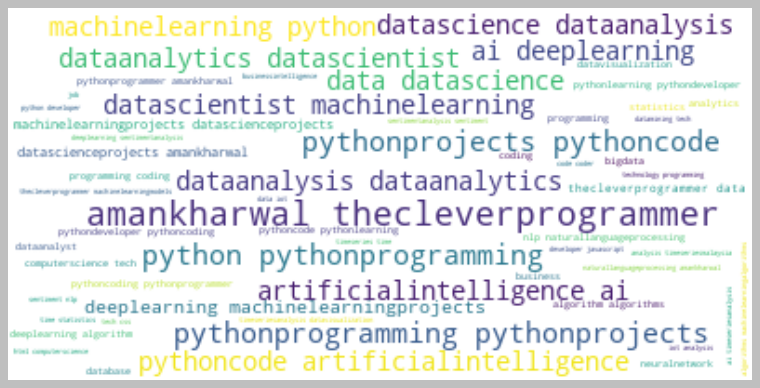

In [90]:
text=" ".join(i for i in ID.Hashtags) 
#her ifadeyi bosluk karakteri kullanarak birlestirir
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

şimdi de ilişkileri analiz edelim
mesela izlenme sayımızla begeni sayımız

In [92]:
figure=px.scatter(data_frame=ID, x="Impressions", y="Likes", 
size="Likes",trendline="ols",
title="Relationship Between Likes and Impressions")
figure.show()
#statsmodels modulunu indirmen gerekebilir --pip install statsmodels

liner bir ilişki oldugunu gorduk 
şimdide yapılan yorum sayısı ile gosterim sayısnın oranına bakalim

In [93]:
figure=px.scatter(data_frame=ID, x="Impressions", y="Comments", 
size="Comments", trendline="ols",
title="Relationship Between Comments and Total Impressions"
)
figure.show()

its looks like the number of comments we get on a post doesnt affect its reach


şimdi de paylasım sayımız ile etkileşim arasındaki ilişkiye bakalim

In [95]:
figure=px.scatter(data_frame=ID, x="Impressions", y="Shares", 
size="Shares", trendline="ols",
title="Relationship Between Shares and Total Impressions")
figure.show()

guzel bir ilişki var ancak begeniler kadar linear bir ilişki oldugunu soyleyemeyiz

In [97]:
figure=px.scatter(data_frame=ID, x="Impressions", y="Saves", 
size="Saves", trendline="ols",
title="Relationship Between Post Saves and Total Impressions"
)
figure.show()

şimdi bunları yaptıktan sonra Impressions sutunun diger sutunlarla korelasyonunu hesaplayalım

In [101]:
correlation=ID.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


C:\Users\Dilber\AppData\Local\Temp\ipykernel_11516\323354327.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



donusum oranını hesaplama profil ziyaretlerinden ne kadar takipci elde edildiğinin analizidir

In [103]:
conversion_rate=(ID["Follows"].sum()/ID["Profile Visits"].sum())*100
conversion_rate

41.00265604249668

buda demek oluyor ki profili ziyaret edenlerin 41% hesabı takip ediyor

In [105]:
figure=px.scatter(data_frame=ID, x="Profile Visits", y="Follows", 
size="Follows", trendline="ols",
title="Relationship Between Profile Visits and Followers Gained"
)
figure.show()

Instagram Erişim Tahmin Modeli
Şimdi bu bölümde bir Instagram gönderisinin erişimini tahmin etmek için bir makine öğrenimi modeli eğiteceğim. Modeli eğitmeden önce verileri eğitim ve test setlerine bölelim:

In [106]:
x=np.array(ID[['Likes','Saves','Comments','Shares',
'Profile Visits','Follows']])
y=np.array(ID['Impressions'])
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,
random_state=42)

In [107]:
x

array([[ 162,   98,    9,    5,   35,    2],
       [ 224,  194,    7,   14,   48,   10],
       [ 131,   41,   11,    1,   62,   12],
       [ 213,  172,   10,    7,   23,    8],
       [ 123,   96,    5,    4,    8,    0],
       [ 144,   74,    7,   10,    9,    2],
       [  76,   22,    5,    1,   26,    0],
       [ 124,  135,    4,    9,   12,    6],
       [ 159,  155,    6,    8,   36,    4],
       [ 191,  122,    6,    3,   31,    6],
       [  81,   28,    6,    3,   29,    4],
       [ 151,  122,    8,   14,   15,    0],
       [ 162,  119,    7,   11,    8,    2],
       [ 142,  121,    5,    5,   20,    4],
       [ 294,  100,    6,   10,  181,   42],
       [ 159,  101,    7,   11,   17,    6],
       [ 205,  111,   17,   18,   16,    2],
       [ 121,  106,    8,    1,   21,    2],
       [ 151,   82,    6,    6,   77,   30],
       [  72,   40,    8,   20,   10,    0],
       [  76,   49,    4,    5,    9,    0],
       [  91,   72,    3,    4,   11,   24],
       [ 1

In [114]:
ytest

array([ 4978,  7407,  2518,  4298,  5394, 32695,  3601,  2218, 10386,
        5542,  6168, 11149,  3234,  2766,  4289,  3854,  2826,  3920,
        3924,  5563,  7571, 16062,  5394,  6432], dtype=int64)

modelimizi egitelim

In [115]:
model=PassiveAggressiveRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.6884158706103121

şimdi de tahminlerde bulunmasını saglayalım

In [116]:
#Features=[['Likes','Saves', 'Comments',.'Shares','Profile Visits','Follows']]
features=np.array([[282.0,233.0,4.0,9.0,165.0, 54.0]])
model.predict(features)

array([9512.01728617])